MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shreyansh Agrawal

EID: sa55742

Name: Praneet Kumar Alamuri

EID: pk22222

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

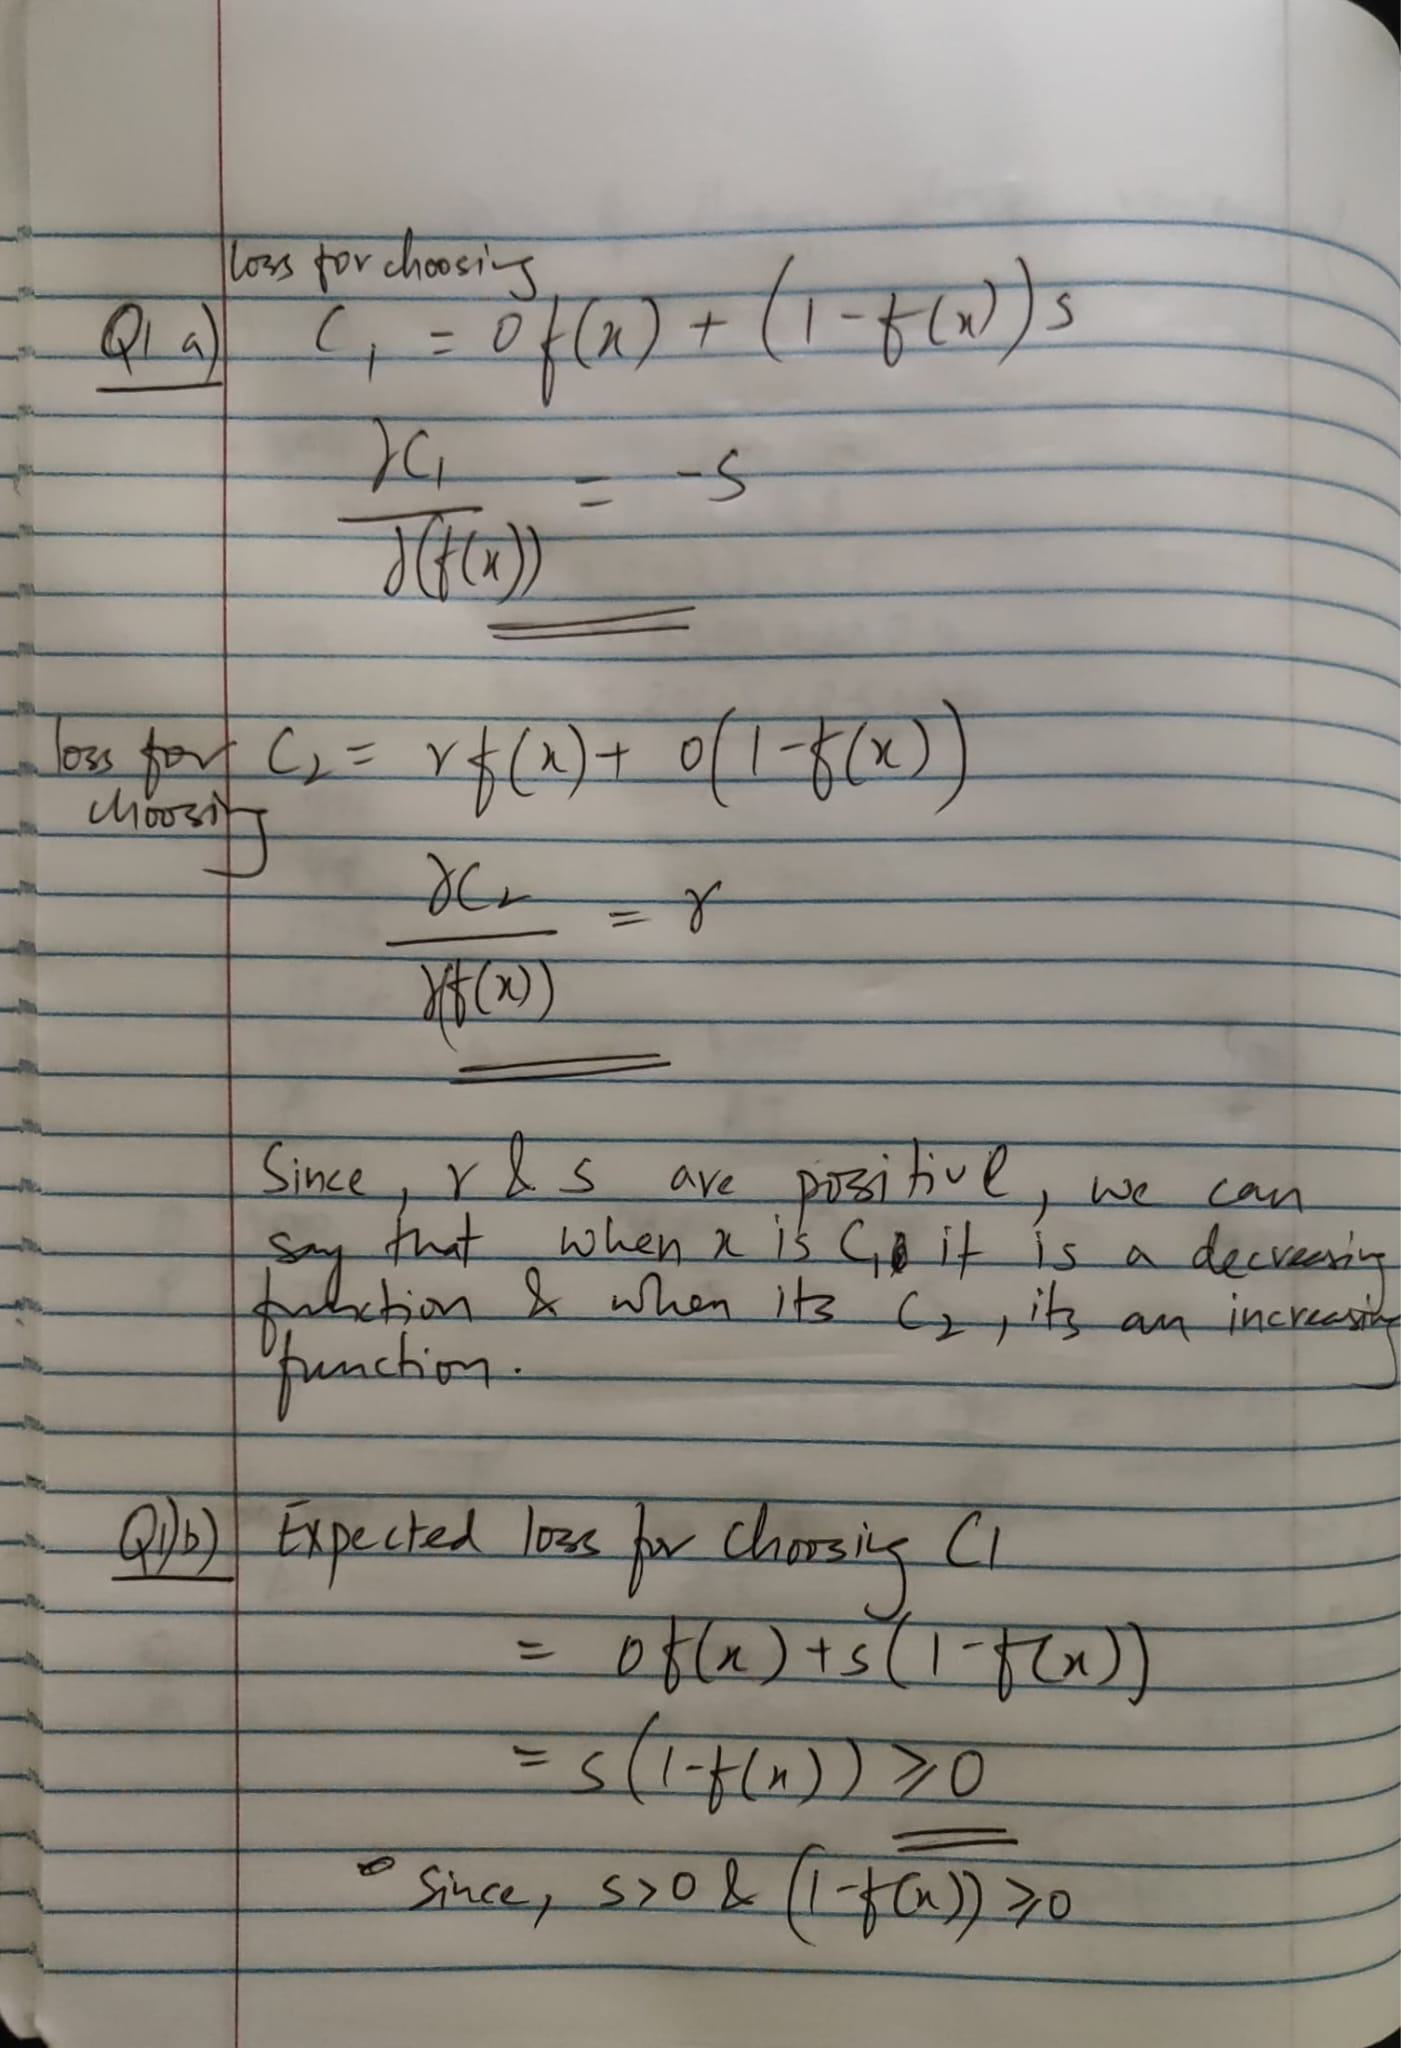

In [73]:
from IPython import display
display.Image("Q1-1.jpeg")

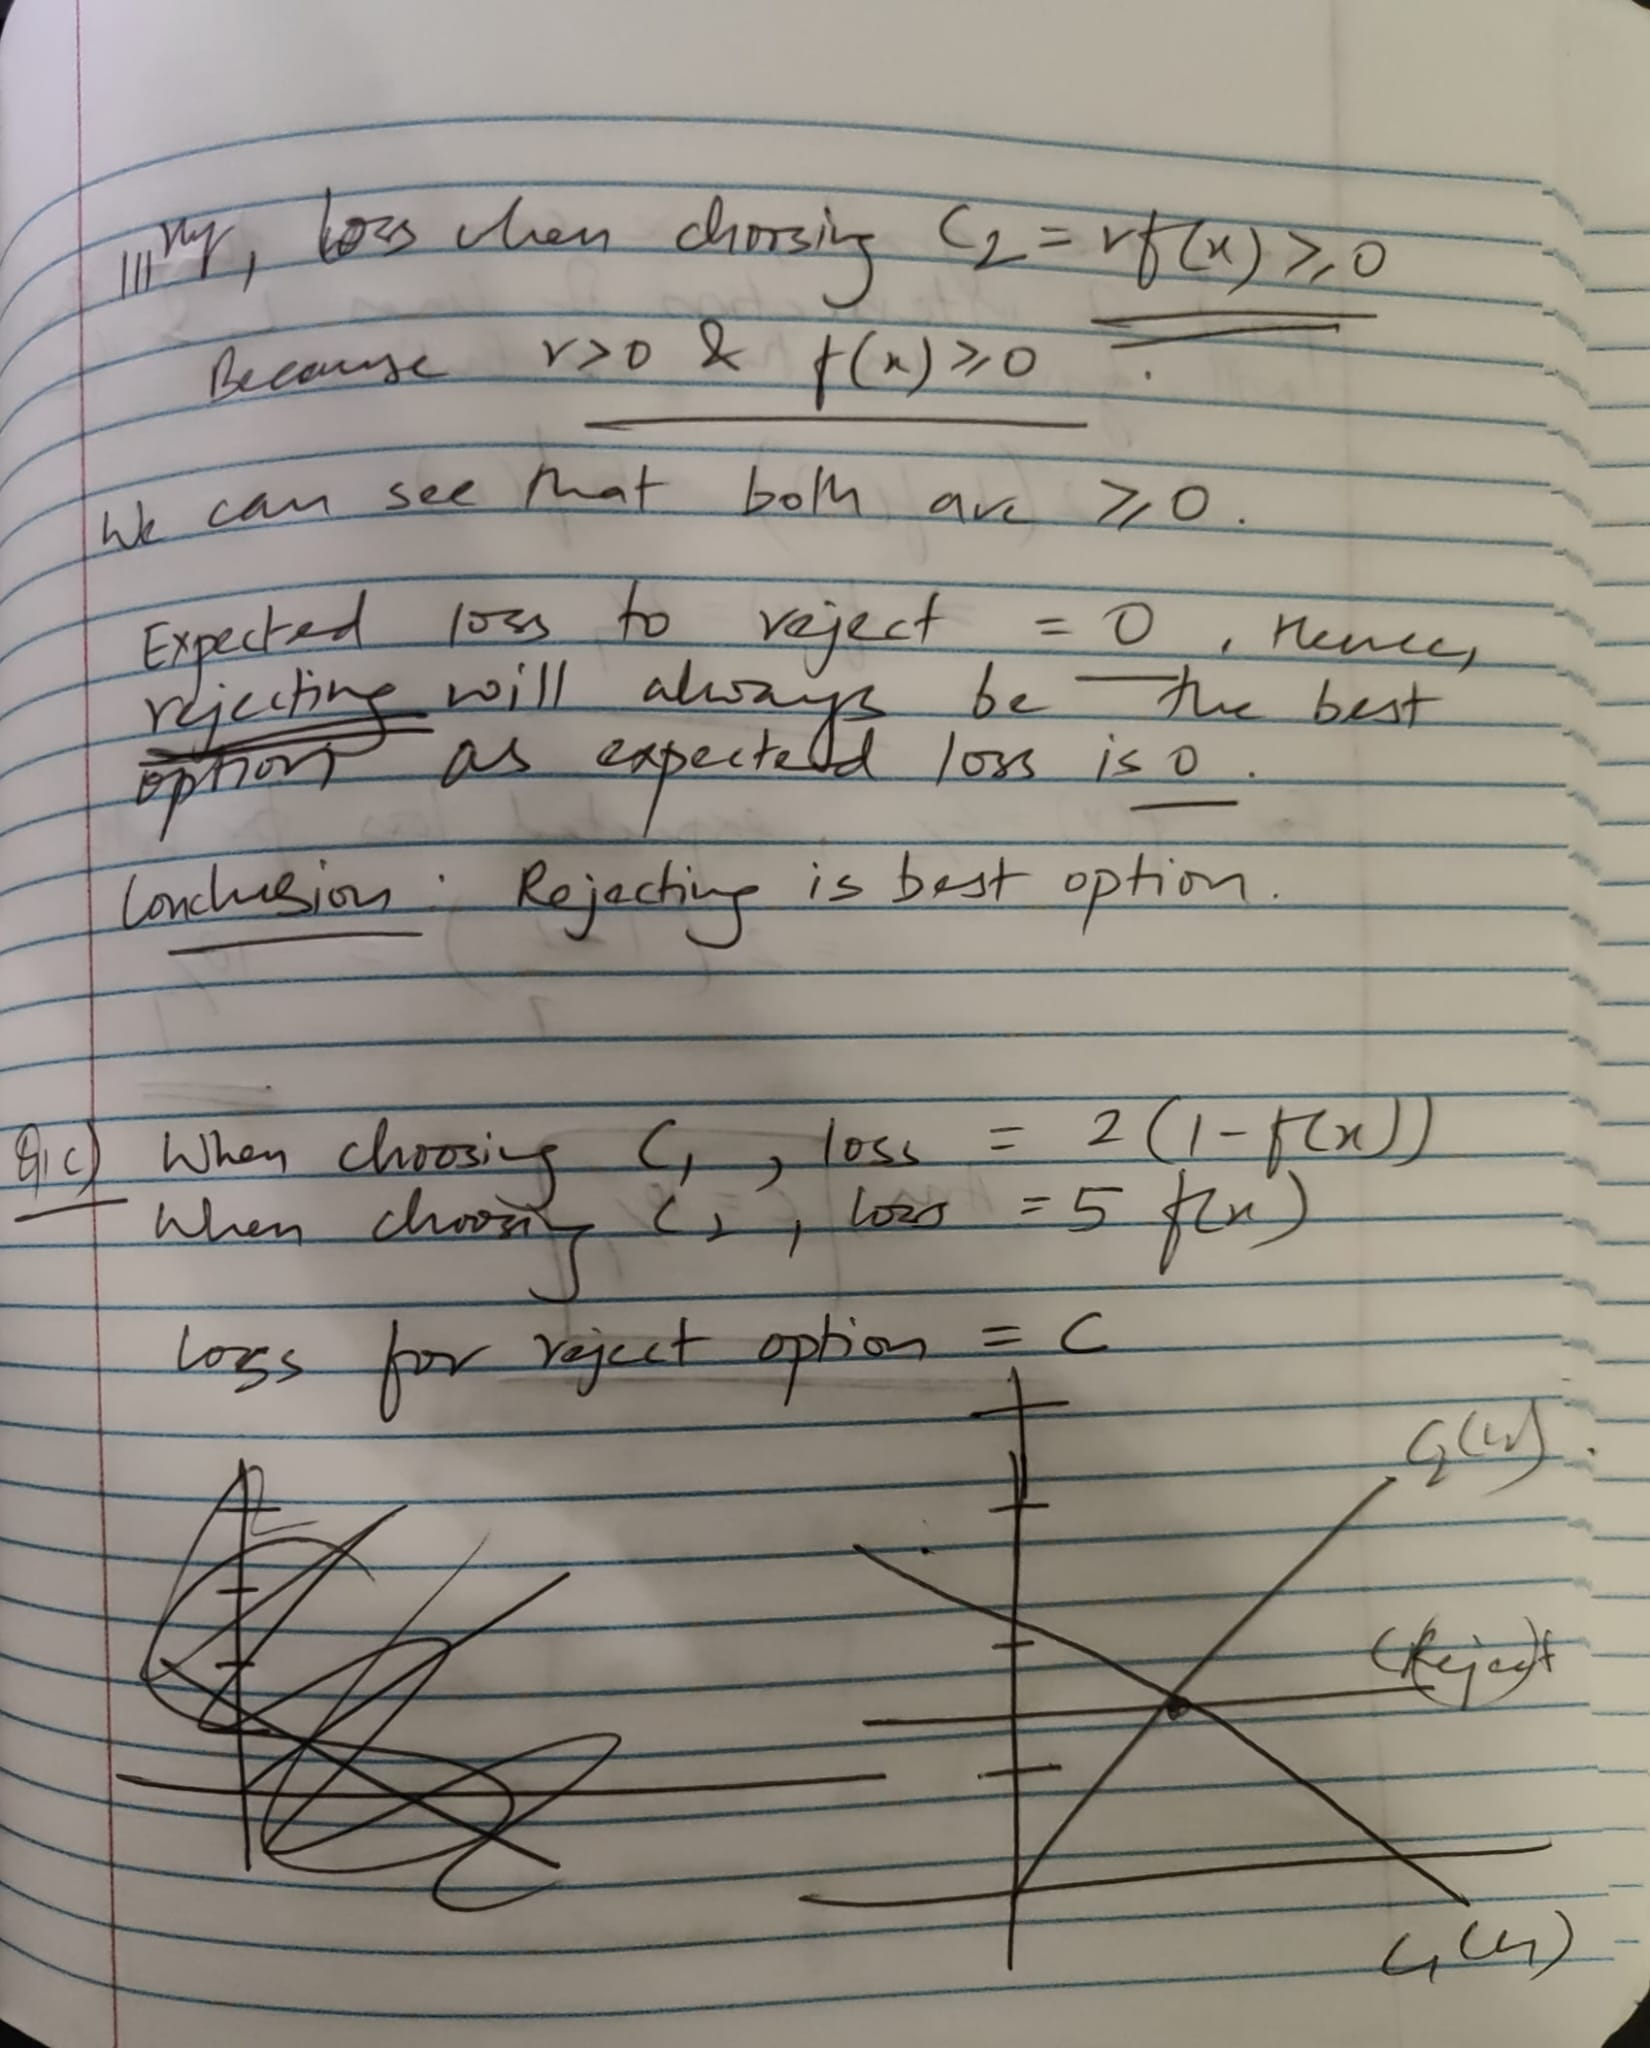

In [74]:
display.Image("Q1-2.jpeg")

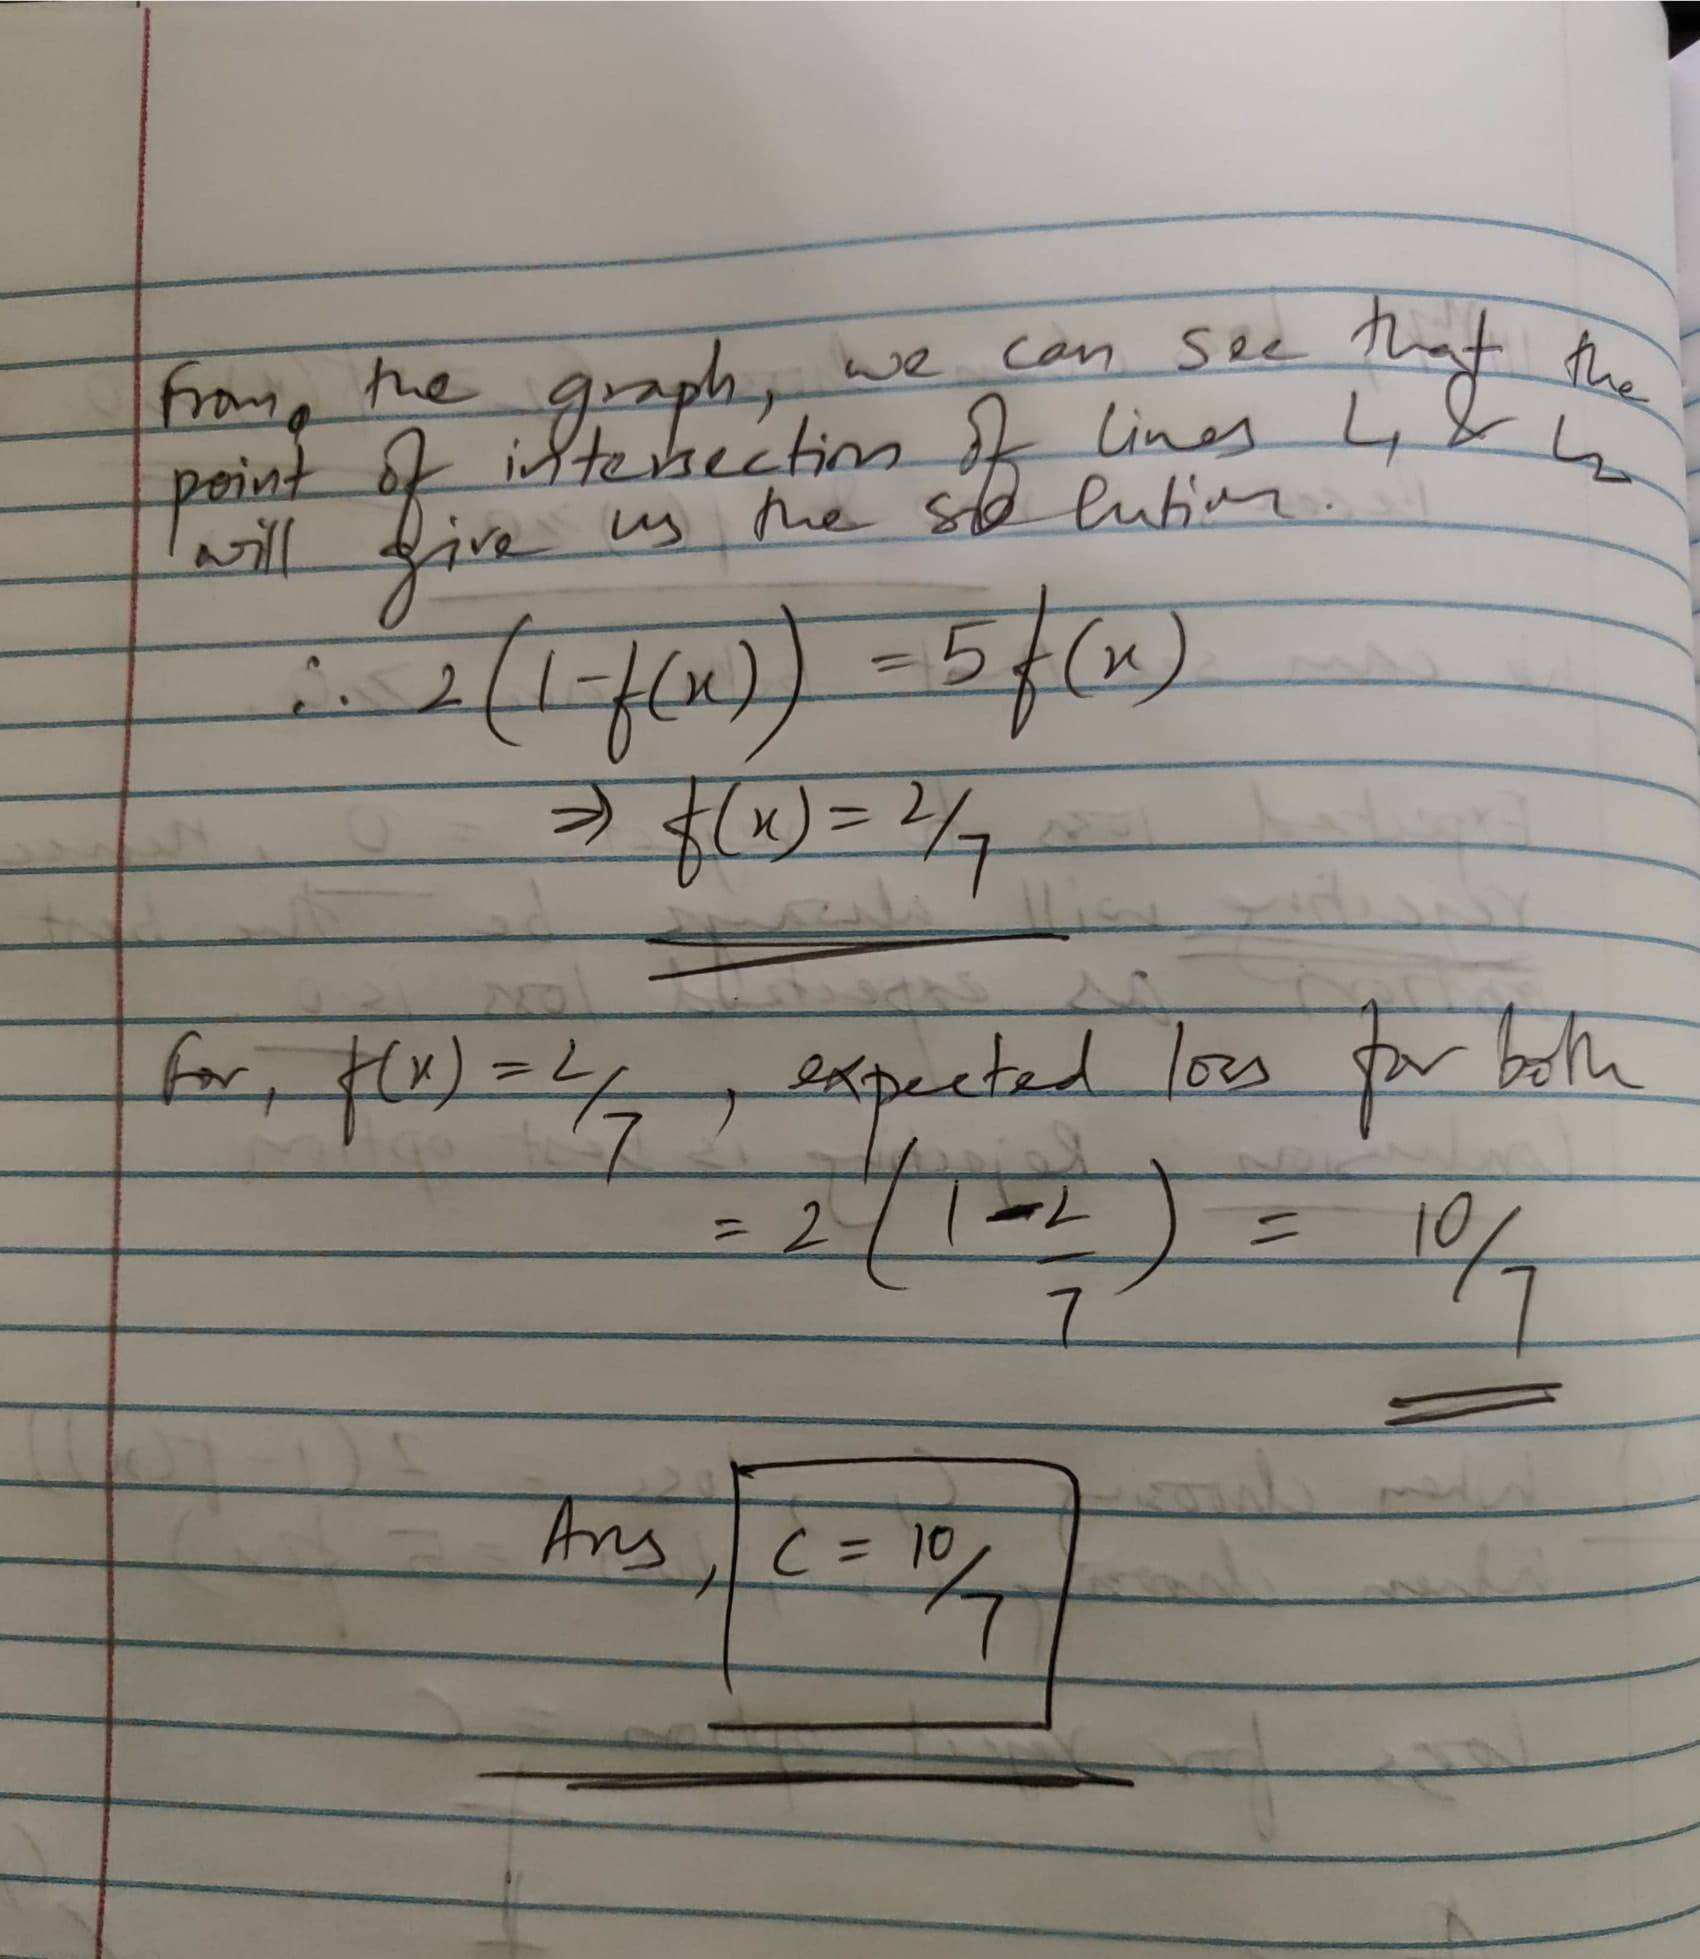

In [75]:
display.Image("Q1-3.jpeg")

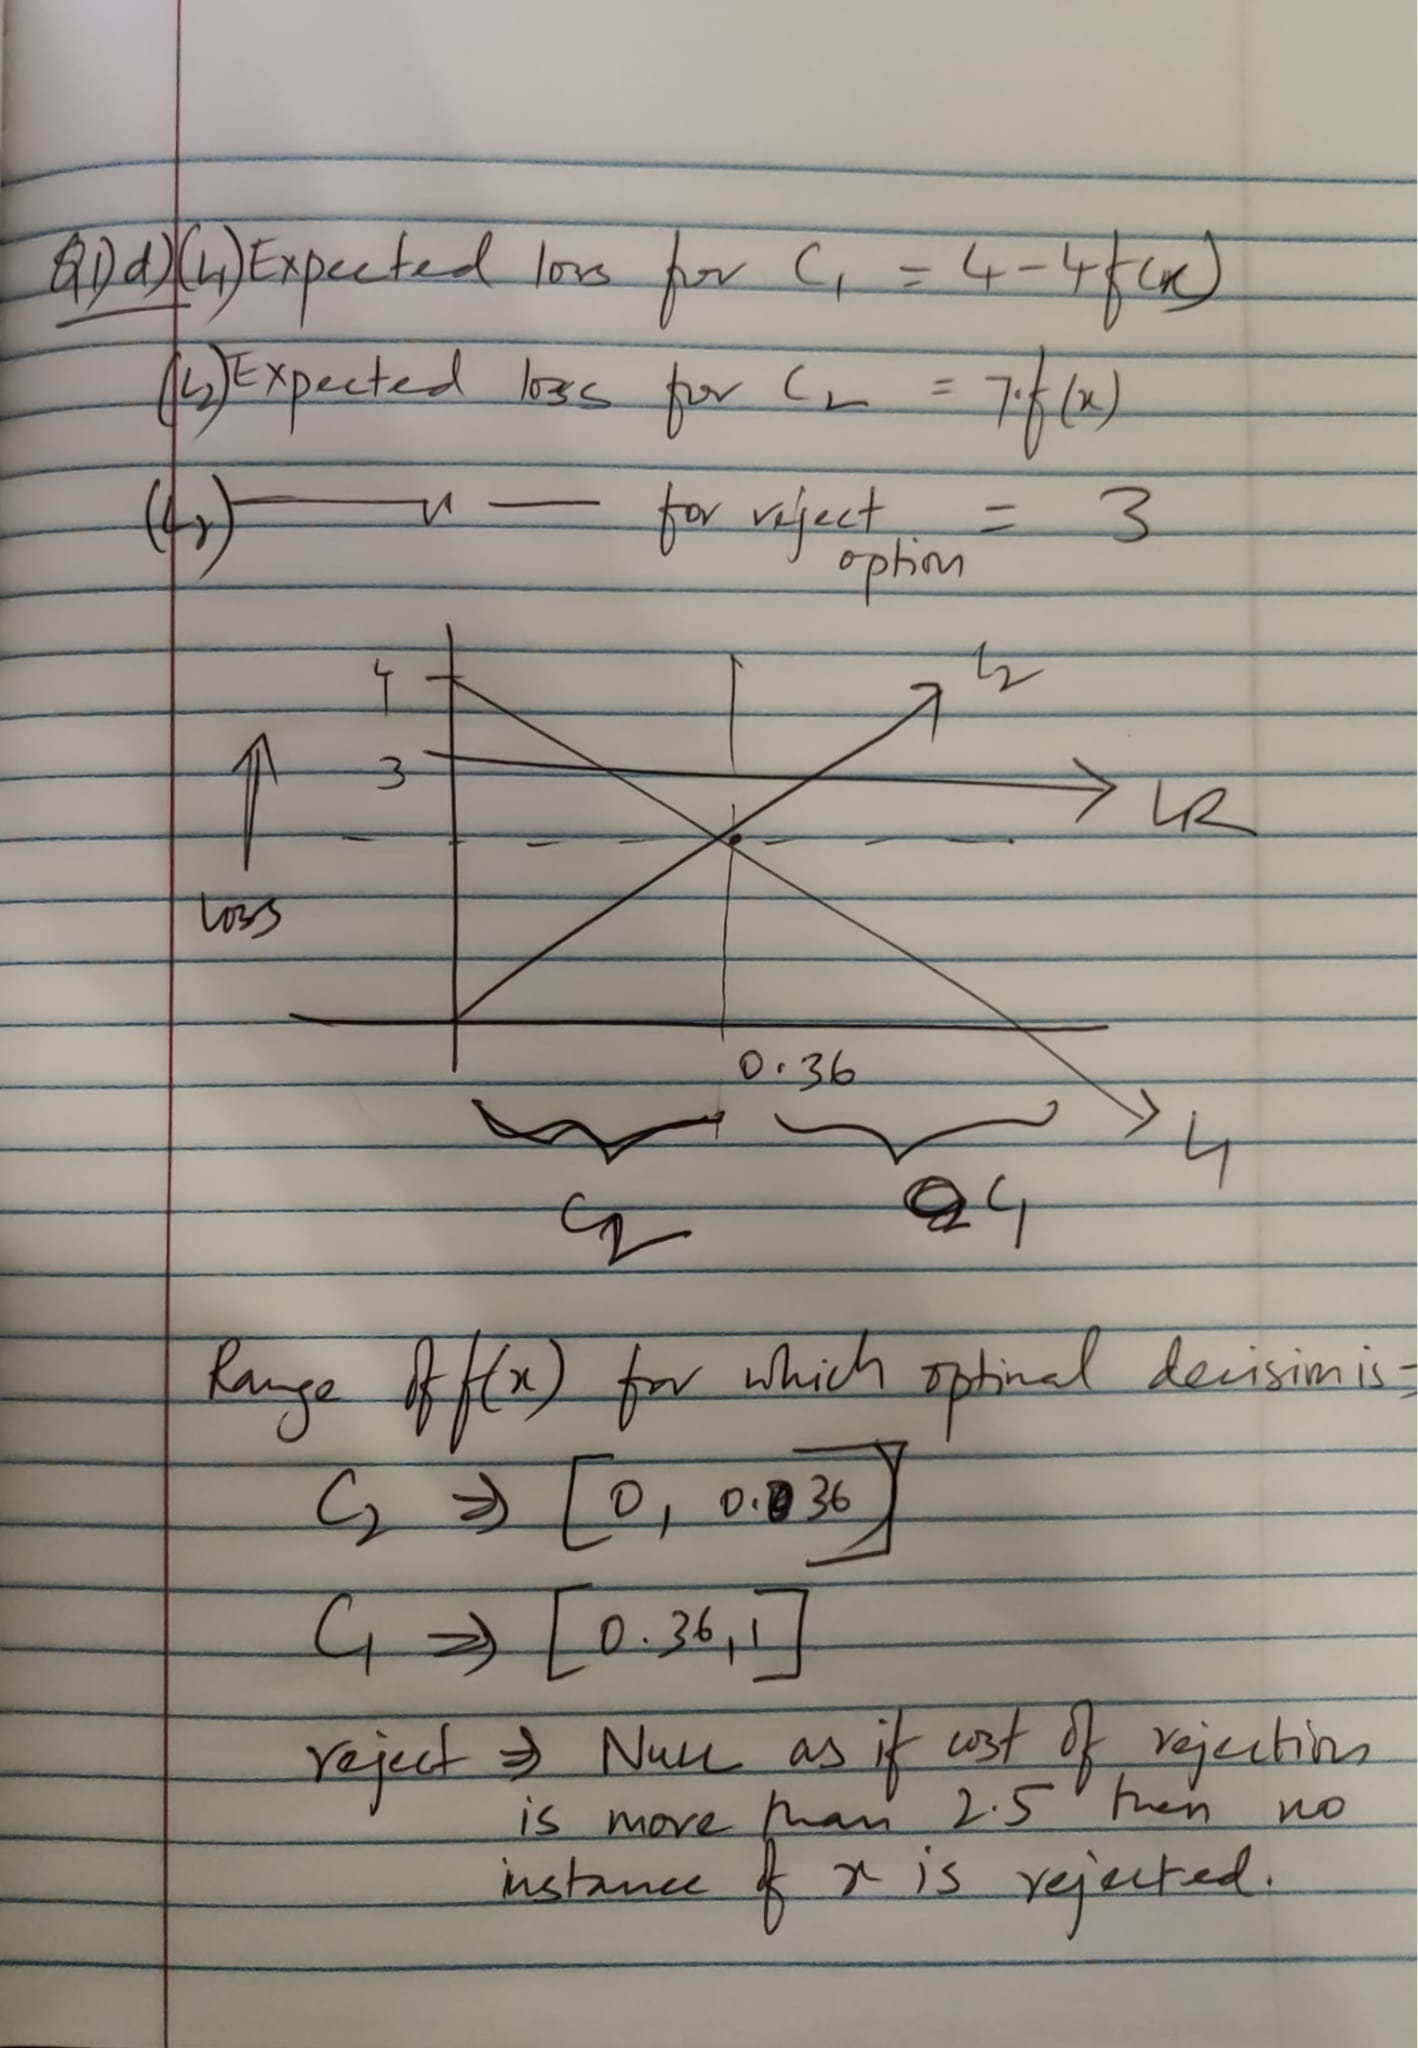

In [76]:
display.Image("Q1-4.jpeg")

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

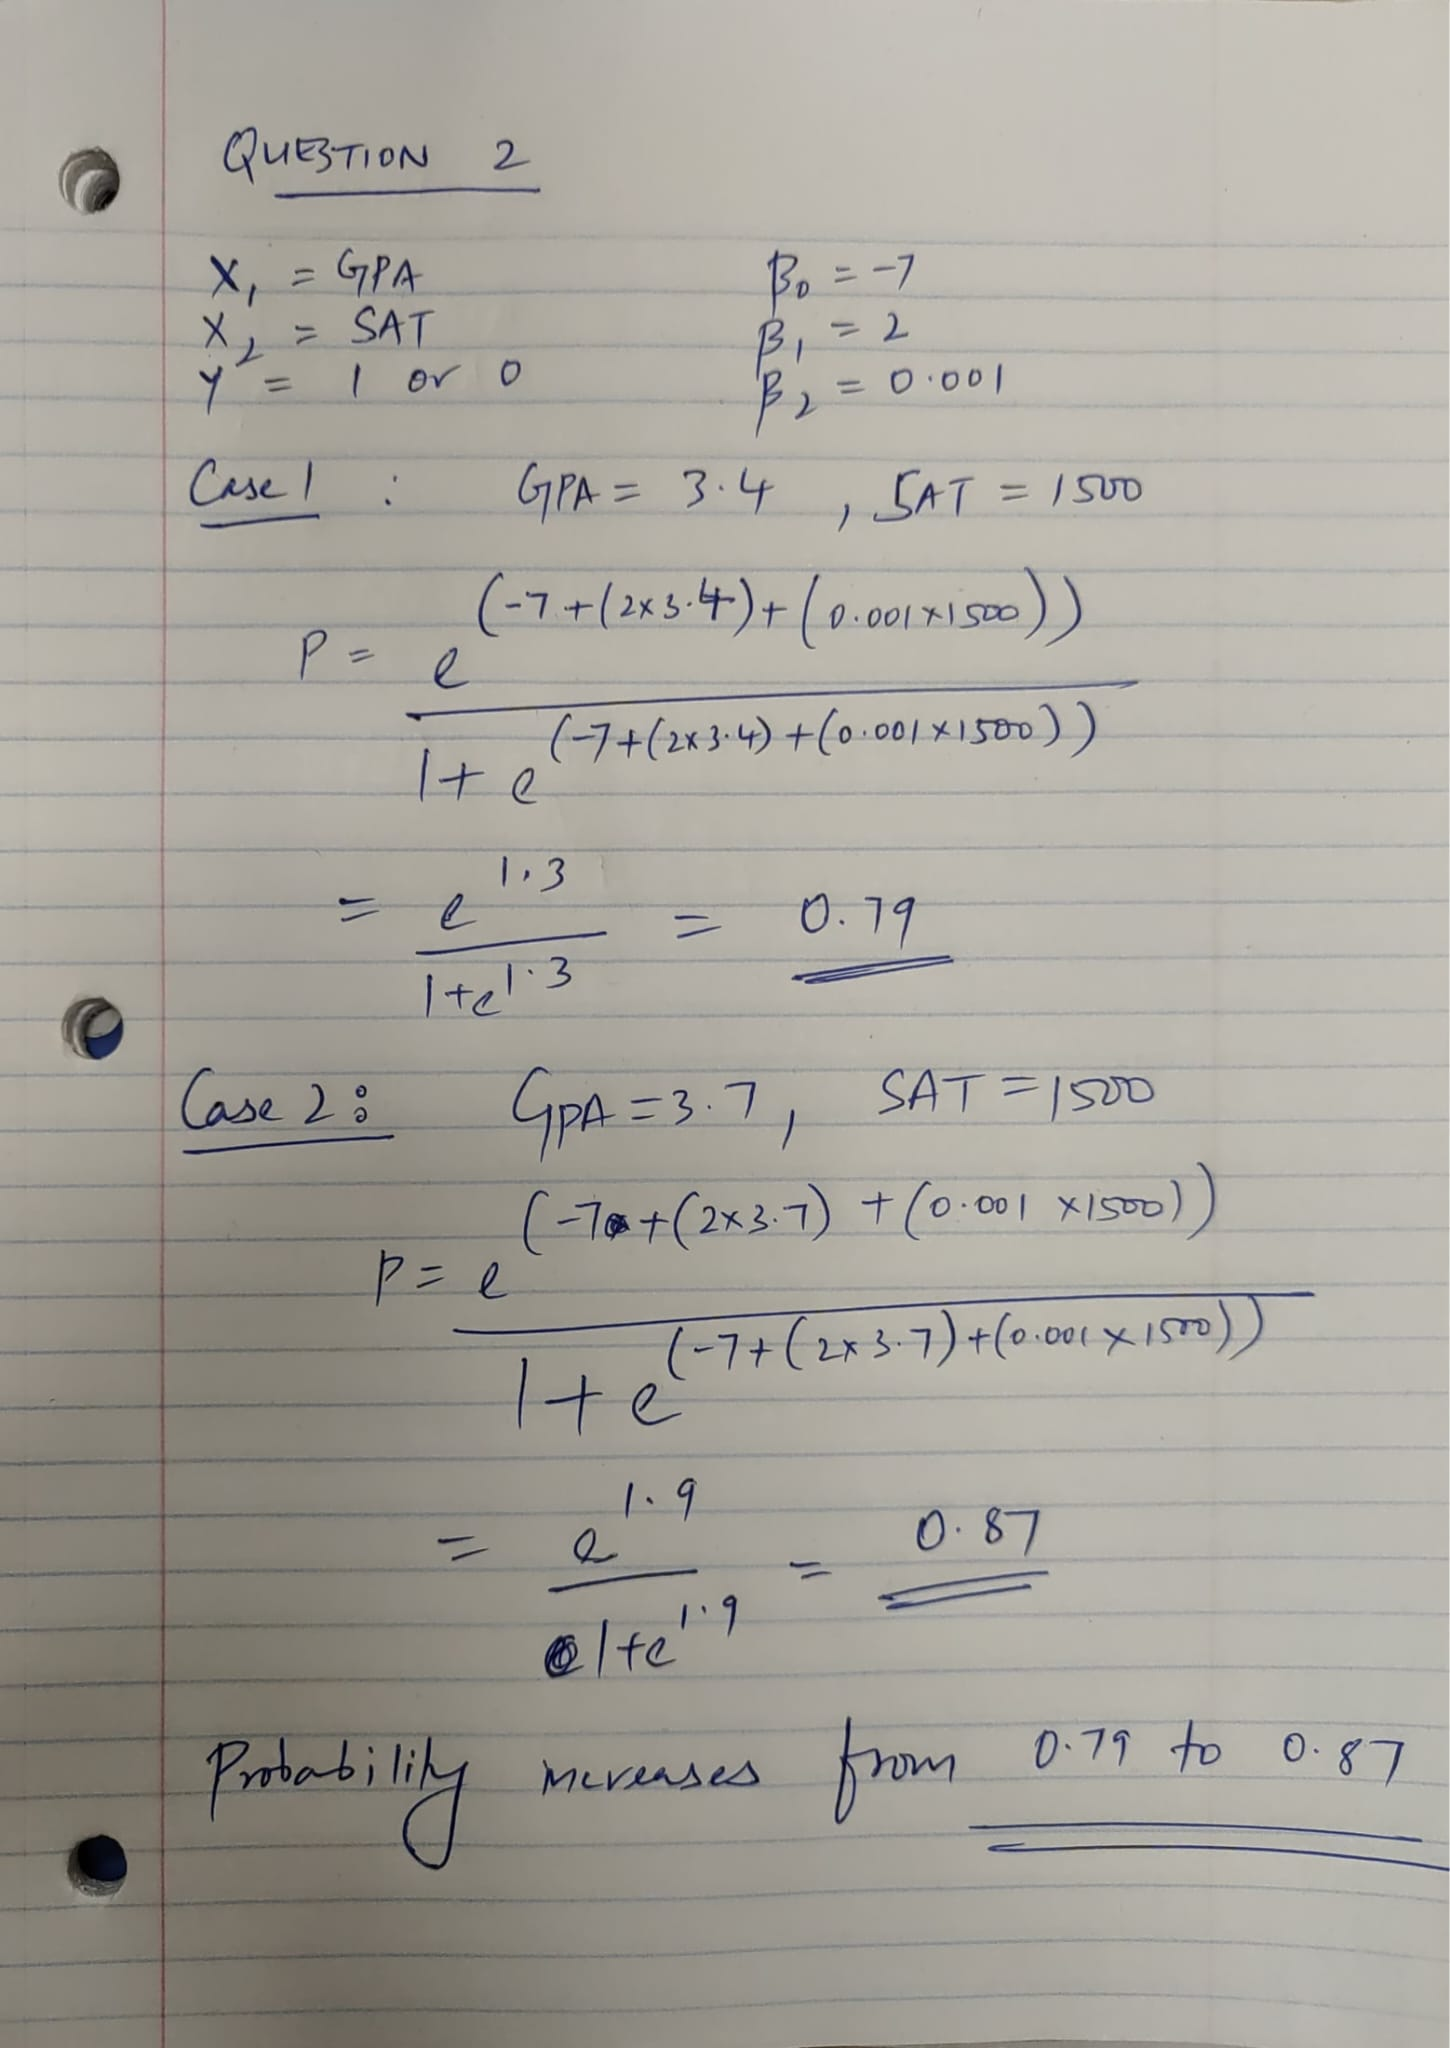

In [77]:
display.Image("Q2.jpeg")


# Question 2: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [78]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv', index_col=0)

In [80]:
# Printing the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [82]:
# Replace values with No
df = df.replace("No internet service","No")
df = df.replace("No phone service","No")

(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [83]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

df[yes_no_columns] = df[yes_no_columns].replace("Yes",1)
df[yes_no_columns] = df[yes_no_columns].replace("No",0)
df = df.replace("Female",1)
df = df.replace("Male",0)

(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [84]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

df2 = df.copy()
transformer = make_column_transformer((OneHotEncoder(drop='first'),['InternetService', 'Contract', 'PaymentMethod']),remainder='passthrough')
transformed = transformer.fit_transform(df2)

# transformed_col_list = [x for x in transformer.get_feature_names_out().tolist() if x.startswith("onehotencoder__")]
# remainder_col_list = [x for x in transformer.get_feature_names_out().tolist() if x.startswith("remainder__")]
transformed_col_list = [x.replace("onehotencoder__",'') for x in transformer.get_feature_names_out().tolist() ]
transformed_col_list = [x.replace("remainder__",'') for x in transformed_col_list ]
df2 = pd.DataFrame(transformed, columns=transformed_col_list)

df2.head()

,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,29.85,29.85,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,56.95,1889.50,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,53.85,108.15,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.70,151.65,1.0


In [85]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [86]:
# Train test split
from sklearn.model_selection import train_test_split
X = df2[[x for x in df2.columns if x!='Churn']].copy()
y = df2['Churn'].copy()
y=y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)
X_train_2,X_val,y_train_2,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15,stratify=y_train)


In [87]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train_2.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

In [88]:
import seaborn as sns
def plot_cf(cf_matrix,labels,title,n_cols):
    matrix_df = pd.DataFrame(cf_matrix)
    ax = plt.subplots(nrows=1,ncols=n_cols)
    sns.set(font_scale=1.3)
    sns.heatmap(matrix_df, annot=True, fmt="g", cmap="magma")
    #set axis titles
    plt.title(title)
    plt.xlabel("Predicted label", fontsize =15)
    #plt.xticklabels(labels)
    plt.ylabel("True Label", fontsize=15)
    #plt.set_yticklabels(labels, rotation = 0)

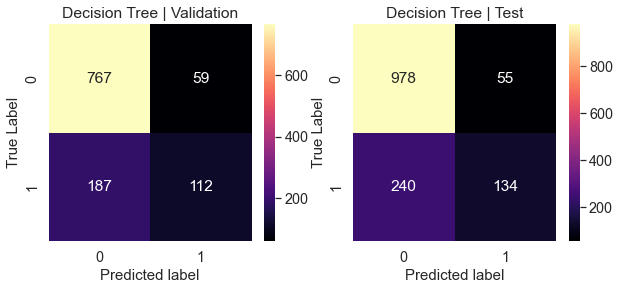

In [89]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix

# Answer here

labels = ['0','1']
title_1 = 'Decision Tree | Validation'
title_2 = 'Decision Tree | Test'

# have tuned the DT a bit
dt_clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
dt_clf = dt_clf.fit(X_train_2, y_train_2)

#validation set prediction
val_pred_dt = dt_clf.predict(X_val)
val_pred_prob_dt = dt_clf.predict_proba(X_val)[:, 1]

#test set prediction
test_pred_dt = dt_clf.predict(X_test)
test_pred_prob_dt = dt_clf.predict_proba(X_test)[:, 1]


#confusion matrix
cf_matrix_val = confusion_matrix(y_true = y_val,y_pred = val_pred_dt)
cf_matrix_test = confusion_matrix(y_true = y_test,y_pred = test_pred_dt)

#plot the result
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_val, annot=True, fmt="g", cmap="magma")
plt.title(title_1)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_test, annot=True, fmt="g", cmap="magma")
plt.title(title_2)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

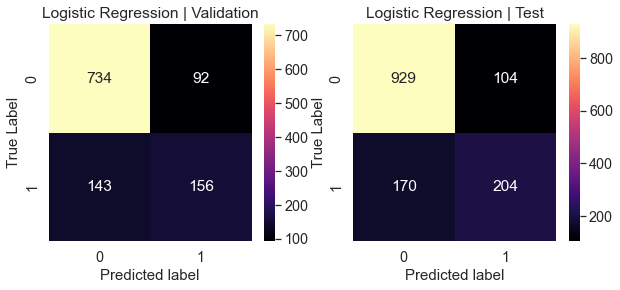

In [90]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Answer here

title_1 = 'Logistic Regression | Validation'
title_2 = 'Logistic Regression | Test'

logit_clf = LogisticRegression()
logit_clf.fit(X_train_2, y_train_2)

#validation set prediction
val_pred_logit = logit_clf.predict(X_val)
val_pred_prob_logit = logit_clf.predict_proba(X_val)[:, 1]

#test set prediction
test_pred_logit = logit_clf.predict(X_test)
test_pred_prob_logit = logit_clf.predict_proba(X_test)[:, 1]

#confusion matrix
cf_matrix_val = confusion_matrix(y_true = y_val,y_pred = val_pred_logit)
cf_matrix_test = confusion_matrix(y_true = y_test,y_pred = test_pred_logit)

#plot the result
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_val, annot=True, fmt="g", cmap="magma")
plt.title(title_1)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_test, annot=True, fmt="g", cmap="magma")
plt.title(title_2)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()


In [91]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# Answer here

mlp_clf_untuned = MLPClassifier(random_state=10, max_iter=500)

# we tried many combinations and this gave best results - have just kept this to reduce runtime
parameter_space = {
    'hidden_layer_sizes': [(10,10)],
    'activation': ['relu','logistic'],
    'solver': ['sgd']
}

# cross validation using grid search cv
mlp_clf = GridSearchCV(mlp_clf_untuned, parameter_space, n_jobs=-1, cv=3)
mlp_clf.fit(X_train_2, y_train_2)

# Best parameter set
print('Best parameters found:\n', mlp_clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'solver': 'sgd'}


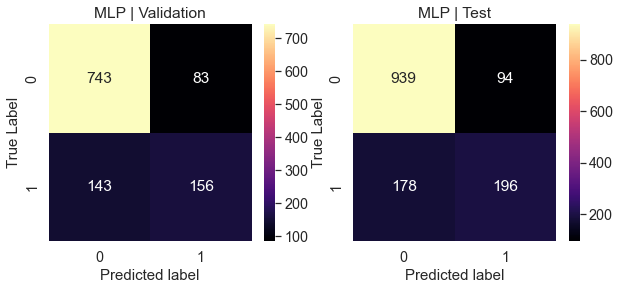

In [92]:
#validation set prediction
val_pred_mlp = mlp_clf.predict(X_val)
val_pred_prob_mlp = mlp_clf.predict_proba(X_val)[:, 1]

#test set prediction
test_pred_mlp = mlp_clf.predict(X_test)
test_pred_prob_mlp = mlp_clf.predict_proba(X_test)[:, 1]

#confusion matrix
cf_matrix_val = confusion_matrix(y_true = y_val,y_pred = val_pred_mlp)
cf_matrix_test = confusion_matrix(y_true = y_test,y_pred = test_pred_mlp)

#plot the result
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

title_1 = 'MLP | Validation'
title_2 = 'MLP | Test'

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_val, annot=True, fmt="g", cmap="magma")
plt.title(title_1)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_test, annot=True, fmt="g", cmap="magma")
plt.title(title_2)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()


Text(0, 0.5, 'TPR')

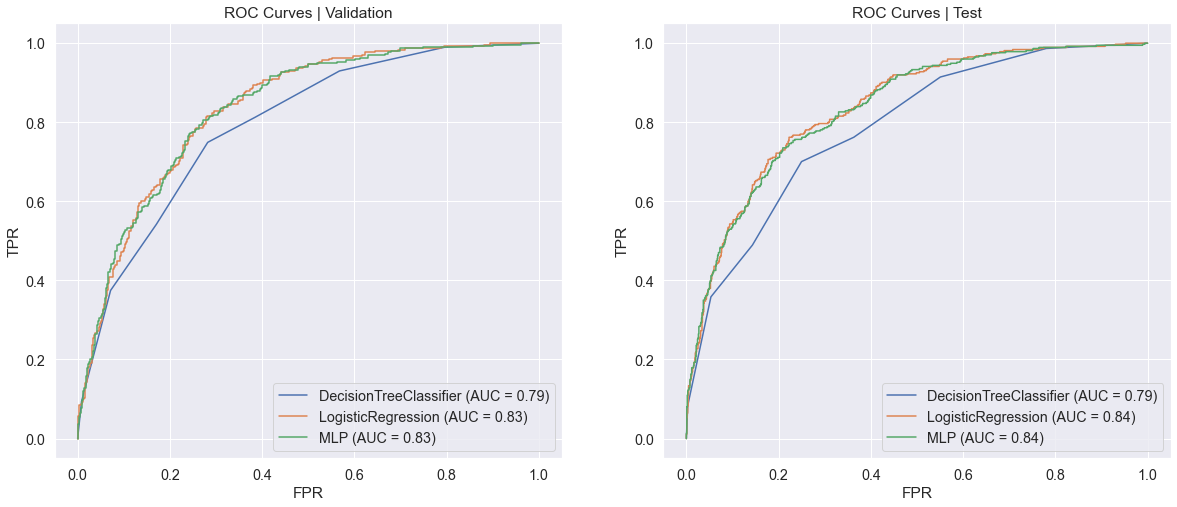

In [93]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)
plt.subplot(1,2,1)

metrics.RocCurveDisplay.from_estimator(dt_clf, X_val, y_val,ax=ax[0])
metrics.RocCurveDisplay.from_estimator(logit_clf, X_val, y_val,ax=ax[0])
metrics.RocCurveDisplay.from_estimator(mlp_clf, X_val, y_val,ax=ax[0],name="MLP")
ax[0].set_title("ROC Curves | Validation")
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

plt.subplot(1,2,2)

metrics.RocCurveDisplay.from_estimator(dt_clf, X_test, y_test,ax=ax[1])
metrics.RocCurveDisplay.from_estimator(logit_clf, X_test, y_test,ax=ax[1])
metrics.RocCurveDisplay.from_estimator(mlp_clf, X_test, y_test,ax=ax[1],name="MLP")
ax[1].set_title("ROC Curves | Test")
ax[1].set_xlabel("FPR")
ax[1].set_ylabel("TPR")


Text(0, 0.5, 'TPR')

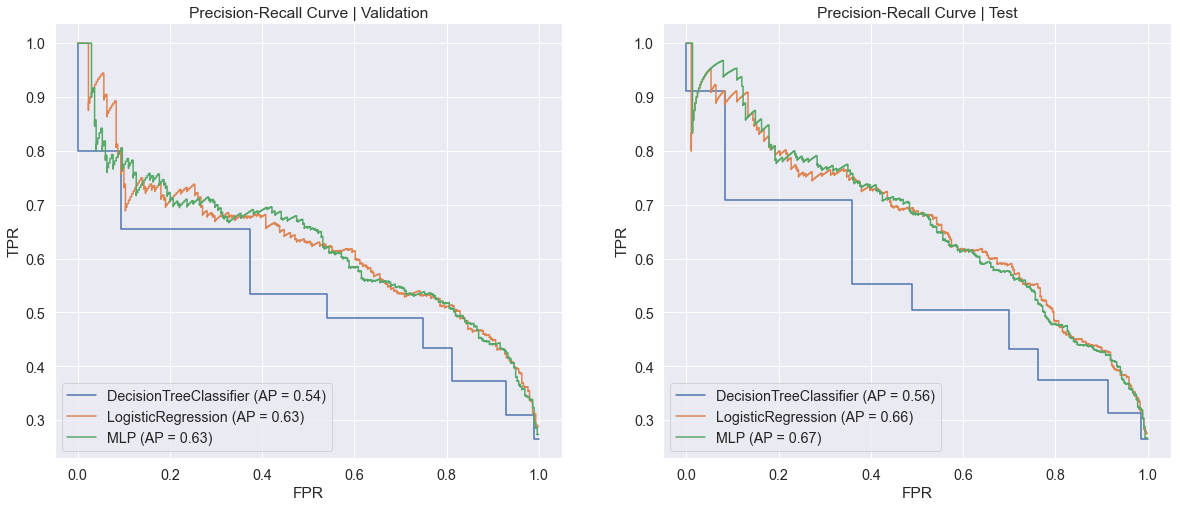

In [94]:
# Plot PR curves
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)
plt.subplot(1,2,1)

metrics.PrecisionRecallDisplay.from_estimator(dt_clf, X_val, y_val,ax=ax[0])
metrics.PrecisionRecallDisplay.from_estimator(logit_clf, X_val, y_val,ax=ax[0])
metrics.PrecisionRecallDisplay.from_estimator(mlp_clf, X_val, y_val,ax=ax[0],name="MLP")
ax[0].set_title("Precision-Recall Curve | Validation")
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

plt.subplot(1,2,2)

metrics.PrecisionRecallDisplay.from_estimator(dt_clf, X_test, y_test,ax=ax[1])
metrics.PrecisionRecallDisplay.from_estimator(logit_clf, X_test, y_test,ax=ax[1])
metrics.PrecisionRecallDisplay.from_estimator(mlp_clf, X_test, y_test,ax=ax[1],name="MLP")
ax[1].set_title("Precision-Recall Curve | Test")
ax[1].set_xlabel("FPR")
ax[1].set_ylabel("TPR")

In [95]:
# f1 score
from sklearn.metrics import f1_score
print("Logit: Validation : F1 Score: " ,f1_score(y_val, val_pred_logit))
print("Logit: Test : F1 Score: " ,f1_score(y_test, test_pred_logit))
print("\n")

print("MLP: Validation : F1 Score: " ,f1_score(y_val, val_pred_mlp))
print("MLP: Test : F1 Score: " ,f1_score(y_test, test_pred_mlp))



Logit: Validation : F1 Score:  0.5703839122486288
Logit: Test : F1 Score:  0.5982404692082111


MLP: Validation : F1 Score:  0.5799256505576208
MLP: Test : F1 Score:  0.5903614457831325


## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [96]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn'].astype("int")

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)
X_train_2,X_val,y_train_2,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15,stratify=y_train)

(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [97]:
# To install imbalanced-learn library use pip install imbalanced-learn command

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=15)

# Answer here
X_res, y_res = sm.fit_resample(X_train, y_train)

(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [98]:
# Answer here
X_train_2,X_val,y_train_2,y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=15,stratify=y_res)

In [99]:
# Number of classes in training Data
y_train_2.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [100]:
# Number of classes in validation Data
y_val.value_counts()

1    826
0    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

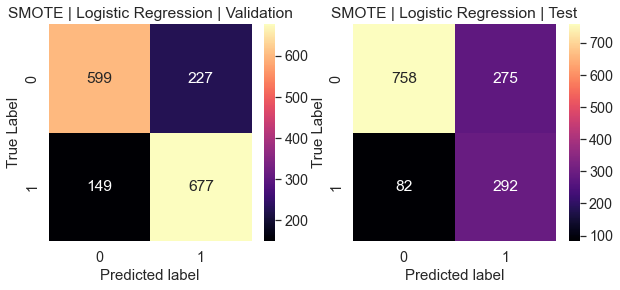

In [101]:
# Logistic Regression

title_1 = 'SMOTE | Logistic Regression | Validation'
title_2 = 'SMOTE | Logistic Regression | Test'

logit_clf = LogisticRegression()
logit_clf.fit(X_train_2, y_train_2)

#validation set prediction
val_pred_logit = logit_clf.predict(X_val)
val_pred_prob_logit = logit_clf.predict_proba(X_val)[:, 1]

#test set prediction
test_pred_logit = logit_clf.predict(X_test)
test_pred_prob_logit = logit_clf.predict_proba(X_test)[:, 1]

#confusion matrix
cf_matrix_val = confusion_matrix(y_true = y_val,y_pred = val_pred_logit)
cf_matrix_test = confusion_matrix(y_true = y_test,y_pred = test_pred_logit)

#plot the result
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_val, annot=True, fmt="g", cmap="magma")
plt.title(title_1)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_test, annot=True, fmt="g", cmap="magma")
plt.title(title_2)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

In [102]:
# MLP

mlp_clf_untuned = MLPClassifier(random_state=10, max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(5,5,5),(10,10)],
    'activation': ['relu','logistic'],
    'solver': ['sgd']
}

# cross validation using grid search cv
mlp_clf = GridSearchCV(mlp_clf_untuned, parameter_space, n_jobs=-1, cv=3)
mlp_clf.fit(X_train_2, y_train_2)

# Best parameter set
print('Best parameters found:\n', mlp_clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'solver': 'sgd'}


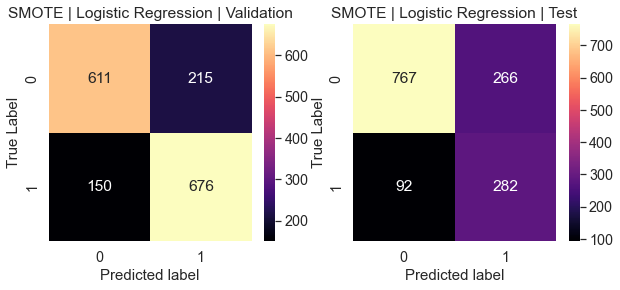

In [103]:
#validation set prediction
val_pred_mlp = mlp_clf.predict(X_val)
val_pred_prob_mlp = mlp_clf.predict_proba(X_val)[:, 1]

#test set prediction
test_pred_mlp = mlp_clf.predict(X_test)
test_pred_prob_mlp = mlp_clf.predict_proba(X_test)[:, 1]

#confusion matrix
cf_matrix_val = confusion_matrix(y_true = y_val,y_pred = val_pred_mlp)
cf_matrix_test = confusion_matrix(y_true = y_test,y_pred = test_pred_mlp)

#plot the result
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_val, annot=True, fmt="g", cmap="magma")
plt.title(title_1)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(cf_matrix_test, annot=True, fmt="g", cmap="magma")
plt.title(title_2)
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()


## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

Text(0, 0.5, 'TPR')

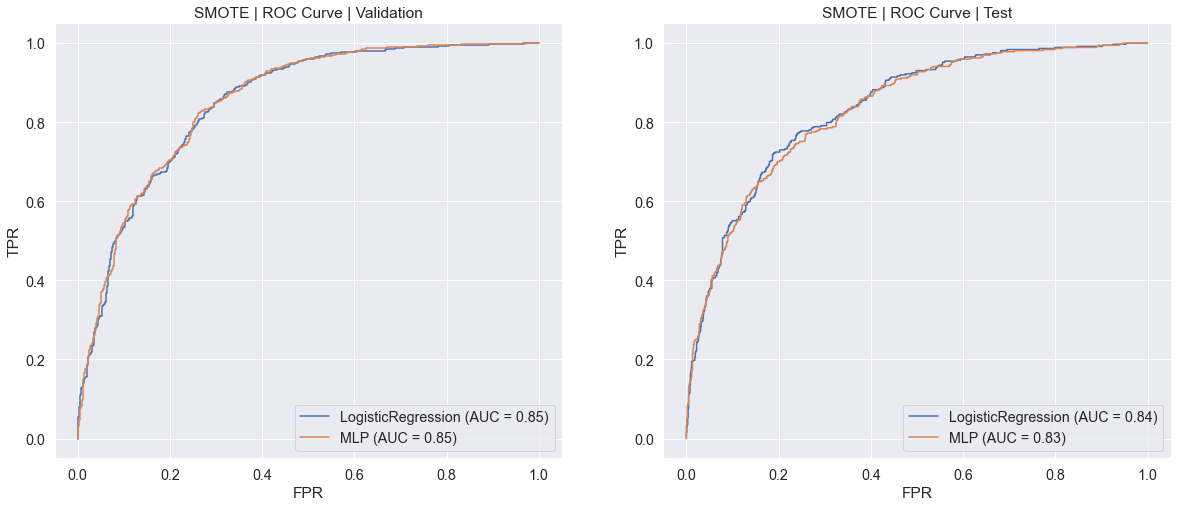

In [104]:
# Plot ROC curves

fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

plt.subplot(1,2,1)
metrics.RocCurveDisplay.from_estimator(logit_clf, X_val, y_val,ax=ax[0])
metrics.RocCurveDisplay.from_estimator(mlp_clf, X_val, y_val,ax=ax[0],name="MLP")
ax[0].set_title("SMOTE | ROC Curve | Validation")
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

plt.subplot(1,2,2)
metrics.RocCurveDisplay.from_estimator(logit_clf, X_test, y_test,ax=ax[1])
metrics.RocCurveDisplay.from_estimator(mlp_clf, X_test, y_test,ax=ax[1],name="MLP")
ax[1].set_title("SMOTE | ROC Curve | Test")
ax[1].set_xlabel("FPR")
ax[1].set_ylabel("TPR")


Text(0, 0.5, 'TPR')

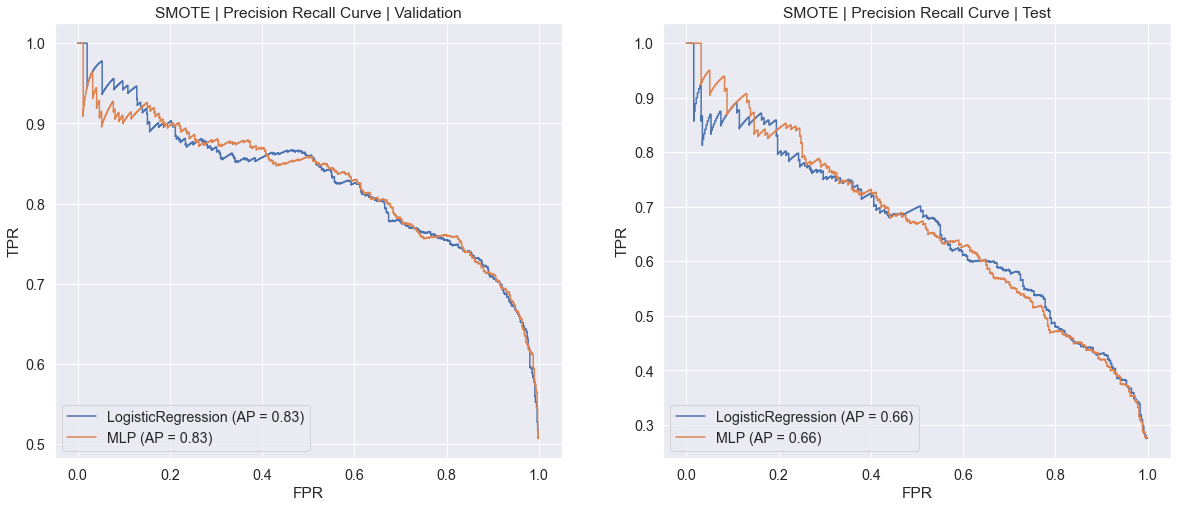

In [105]:
# Plot ROC curves

fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)

plt.subplot(1,2,1)
metrics.PrecisionRecallDisplay.from_estimator(logit_clf, X_val, y_val,ax=ax[0])
metrics.PrecisionRecallDisplay.from_estimator(mlp_clf, X_val, y_val,ax=ax[0],name="MLP")
ax[0].set_title("SMOTE | Precision Recall Curve | Validation")
ax[0].set_xlabel("FPR")
ax[0].set_ylabel("TPR")

plt.subplot(1,2,2)
metrics.PrecisionRecallDisplay.from_estimator(logit_clf, X_test, y_test,ax=ax[1])
metrics.PrecisionRecallDisplay.from_estimator(mlp_clf, X_test, y_test,ax=ax[1],name="MLP")
ax[1].set_title("SMOTE | Precision Recall Curve | Test")
ax[1].set_xlabel("FPR")
ax[1].set_ylabel("TPR")

In [106]:
from sklearn.metrics import f1_score
print("Logit: Validation : F1 Score: " ,f1_score(y_val, val_pred_logit))
print("Logit: Test : F1 Score: " ,f1_score(y_test, test_pred_logit))
print("\n")

print("MLP: Validation : F1 Score: " ,f1_score(y_val, val_pred_mlp))
print("MLP: Test : F1 Score: " ,f1_score(y_test, test_pred_mlp))

Logit: Validation : F1 Score:  0.7826589595375723
Logit: Test : F1 Score:  0.6206163655685442


MLP: Validation : F1 Score:  0.7874199184624344
MLP: Test : F1 Score:  0.6117136659436008


Answer c)

Below are the values from the above modelling - 


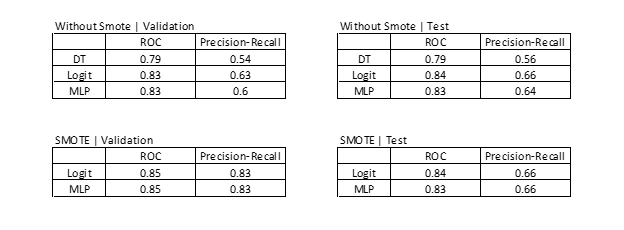

In [107]:
display.Image("Q3.png")


* Post SMOTE, we can see that in validation set, both the  models have similar performance, but in test, logit has slightly better ROC but same PR-AUC (although the difference is not significant). So we can say that both the models have comparable results. I would choose logit since its a simpler model and requires far less tuning.

* Without SMOTE, logit has slighly better ROC and PR-AUC than MLP, so it performed slightly better.

* We can see that the ROC did not change a lot on both test and validation set post SMOTE

* But for PR Curves, we can see that the PR curve improved significantly post SMOTE for the validation set but was more or less same for the test set. This is due to the fact that the validation set is oversampled using SMOTE and hence the performance is better. But the test set is on the raw version and hence in test set the model did not show an improvement. Test data is the better representation of the actual problem and if the model would have performed better on the test set, then we would have said that SMOTE helped. But in this case it did not. So synthetic oversampling may not always work to handle class imbalance. For logit, we can try using cost sensitive learning (Adding parameter class_weight = 'balanced') and may handle class imbalance better.

* Also, from the f1 score we can see that the f1 scores on the test data for both MLP and Logit has improved only slighlty, but on validation, they have improved a lot. This again validates our point that the validation set is not the actual representation of the problem and we should consider the performance on the test set which has not imporved a lot.  

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 





**(a) [4 pts]** Find the probability that  Umbrella = 0 

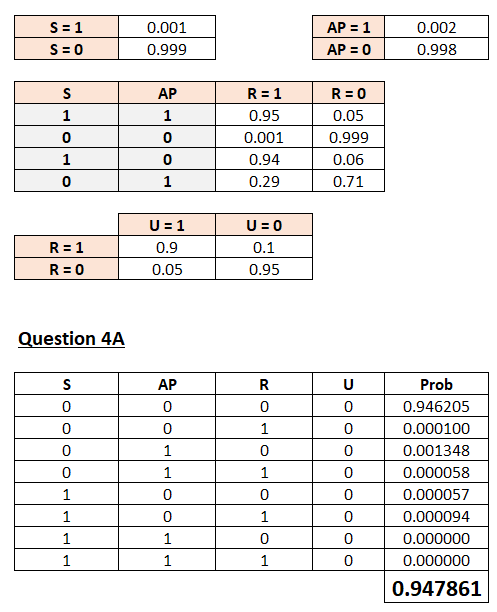

In [108]:

display.Image("4A.png")

**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

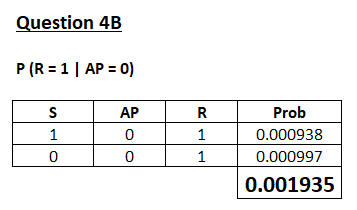

In [109]:
display.Image("4B.png")

**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)

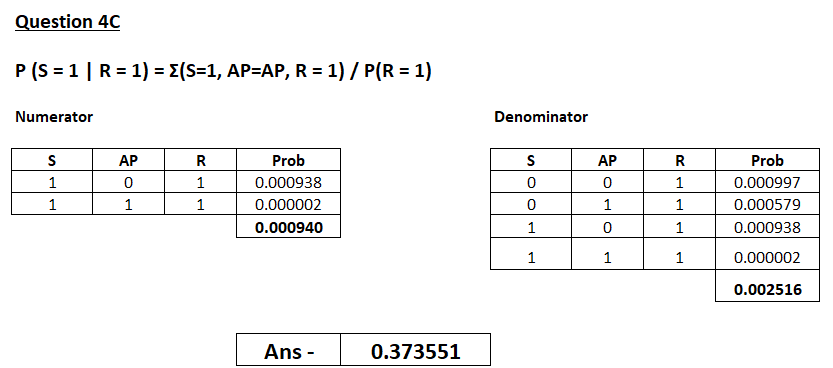

In [110]:
display.Image("4C.png")

# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.

Answer 1

SVM is the extension of the maximum margin classifier with a soft boundary. If we ignore the soft boundary thing for now, the maximum margin classifier tries to generate a linear boundary in the feature space (for now we have not transformed any feature i.e., used any kernel) such that the two classes are separated with the maximum distance (orthogonal to the decision boundary). There can be many such decision boundaries that perfectly separates the two classes, but SVM tries to find the decision boundary such that the margin is maximum and ensures the maximum separation. Hence, the optimal decision boundary. It also makes sense as it'll perform better on the unseen data since the separation is maximum.

Also, the decision boundary only depends on the support vectors (observations used to calculate the maximum margin) - so adding new data that does not violate the margin does not change the decision boundary, and hence your decision boundary is in a way insensitive to the new data (As long as the above criteria is met).


Answer 2

The above method (using a hard boundary) works when the classes are neatly separated. But in case there is an overlap, then we need to allow some violations i.e., some observations to creep past the margin. So slack variables allow certain constraints to be violated. In case there are no slacks, then we might overfit the data as the decision boundary would try too hard to separate the two classes. But introduction of slack allows us to reduce the variance by compromising on the bias - hence, slack variables allow us to do bias-variance tradeoff. As the number of violations allowed increases, more bias is introduced and vice-versa. So, this parameter can be tuned to get the optimal result.

Answer 3

SVM is very powerful algorithm as it tries to model a linear decision boundary in a transformed feature space using kernel trick. We'll not got into the details of the kernel trick but basically what it does is that it transforms the features non-linearly using the kernel functions such that the classes can be separated using a linear boundary in the transformed space. Below is a very broad idea of what it does using a polynomial kernel function.



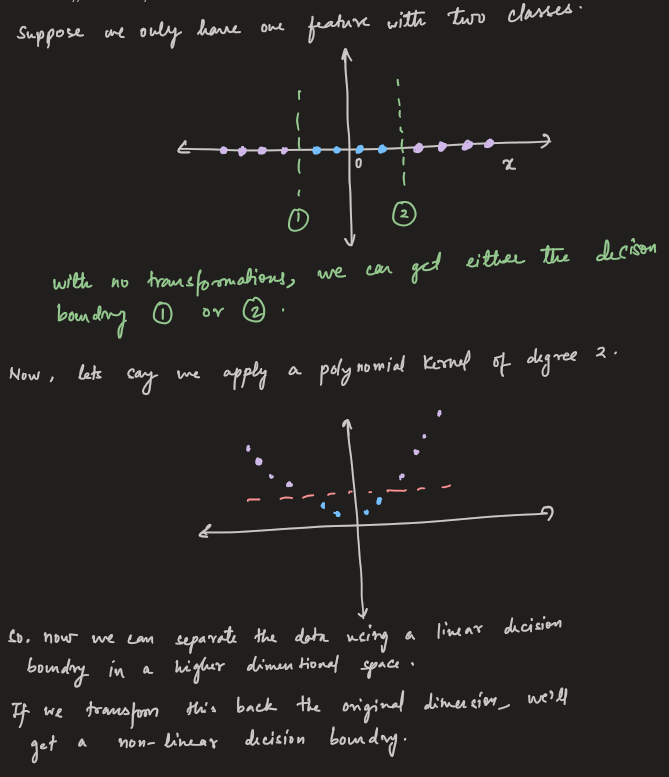

In [111]:
display.Image("5C.png")